In [ ]:
# INTEL CORPORATION CONFIDENTIAL AND PROPRIETARY
# 
# Copyright © 2018-2021 Intel Corporation.
# 
# This software and the related documents are Intel copyrighted
# materials, and your use of them is governed by the express 
# license under which they were provided to you (License). Unless
# the License provides otherwise, you may not use, modify, copy, 
# publish, distribute, disclose or transmit  this software or the
# related documents without Intel's prior written permission.
# 
# This software and the related documents are provided as is, with
# no express or implied warranties, other than those that are 
# expressly stated in the License.

# Single Layer Image Classifier

This tutorial shows how to use the simplistic Single Layer Image Classifier (SLIC) module consisting of a special input encoder and a single neural output layer:

![Structure](figures/slic_structure.png)

Image input is pre-processed by a special scan-line algorithm which is essentially an edge detection algorithm that finds  contrast changes in the input space along certain scanlines. A significant-enough contrast change along a certain scan line is then converted into a spike on a certain input axon:

![Scanline_Algorithm](figures/slic_scanline.png)

Each neuron in the output layer represents a certain class of objects which are trained by supervised learning. The learning supervised spike-time dependent plasticity rule (S-STDP) is inspired from the simple delta-rule derived by back propagation of a linear neuron:

![Scanline_Algorithm](figures/slic_equations.png)

The supervisory signal is provided by dynamically assigning the depressive learning S-STDP rule to the synapses of the out-of-class neurons and assigning the potentiating rule to the synapses of the in-class neuron during training.

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import random

from nxsdk_modules.slic.src.nxnet.slicnet_nxnet import SlicNet

##  1. Load training and inference data

To build a SLIC network, training images and their corepsonding labels are needed to train the network. In this tutorial, we are using images from the COIL20 dataset. Both, the training and inference images and their expected labels are located in nxsdk_modules/slic/data. 

In [2]:
trainLabelsFile="../data/trainLabel.npy"             
trainImagesFile="../data/trainData.npy"
inferLabelsFile="../data/inferLabel.npy"
inferImagesFile="../data/inferData.npy"
               
def getLabelAndImageData(labelFile, imageFile):
    try:
        labelData = np.load(labelFile)
        imageData = np.load(imageFile)
    except IOError:
        print("Cannot Open Label Files or Image Files")
        raise
    return labelData, imageData
    
trainLabelData,trainImageData = getLabelAndImageData(trainLabelsFile, trainImagesFile)
inferLabelData,inferImageData = getLabelAndImageData(inferLabelsFile, inferImagesFile)

There are 720 training images and 720 inference images in the above files, with each image in dimension of 20x20. The total number of classes in the images is 20. The training images and the corresoponding labels are shown below.

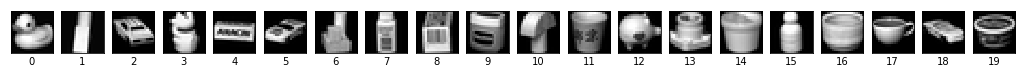

In [3]:
label,indices = np.unique(trainLabelData, return_index = True) 

plt.figure(1, figsize=(18,10))

for i,index in enumerate(indices): 
    plt.subplot(1, len(indices),i+1 )
    plt.imshow(trainImageData[index],cmap='gray')
    plt.xticks([],[])
    plt.yticks([],[])
    plt.xlabel(i)

## 2. Select the set of images for training and inference

We can select a subset of images to be trained and inferenced from the files. In the example shown below, we are training numTrain images starting from trainIndex, then do inference on numInfer images starting from inferIndex.     

In [4]:
trainIndex = 0
numTrain = 720
inferIndex = 10
numInfer = 5

trainLabelSet = trainLabelData[trainIndex:trainIndex+numTrain]
trainImageSet = trainImageData[trainIndex:trainIndex+numTrain]
inferLabelSet = inferLabelData[inferIndex:inferIndex+numInfer]
inferImageSet = inferImageData[inferIndex:inferIndex+numInfer]

## 3. Create SLIC network
With the selected trainImageSet and inferImageSet, a SLIC network can be instantiated. The images in the above files are gray scaled images, which need to be binarized before training. Binarization is done when the network is instantiated. 

In [5]:
model = SlicNet(trainLabelData=trainLabelSet, 
                trainImageData=trainImageSet, 
                inferLabelData=inferLabelSet, 
                inferImageData=inferImageSet)

Processing Training Images
Training 720 images 


## 4. Compile the network
By default, the SLIC network will use the parameters in nxsdk_modules/slic/src/nxnet/modelparams.py to configure the network. Users can change those parameters according to their application. Please refer to documentation for further information. 

Probes can be set up to help analyze the behaviour of neurons. There are different probes available for neuron voltage, current, soma activities and spikes. In this tutorial, only SpikeProbes are used to illustrate the spikes of neurons.

In [6]:
model.configureCx()
model.configureConnectivity()
model.setupSpikeProbes()
model.compileNetwork()

Compiling the Network
Setting up Activity Probes
Creating Snips and Channels
INFO:DRV:  SLURM is being run in background
INFO:DRV:  Connecting to 134.134.68.81:18861


## 5. Training the Network

Now we can start training the network. After training is finished, the weights of the trained network can be saved in a file by calling getWeightMatrix().  

In [7]:
model.runTraining()
#model.getWeightMatrix(file="weight")

Num iterations is :  2
INFO:DRV:  N2Driver: Running...
INFO:DRV:      Compiling synapses... Done (0.12s)
INFO:DRV:      Processing probes... Done (0.00s)
INFO:DRV:      Writing modified registers... Done (0.15s)
INFO:DRV:      Initializing... Done (0.01s)
INFO:DRV:      Preparing input... Done (0.00s)
INFO:DRV:      Executing... Done (11.38s)
INFO:DRV:      Processing timeSeries... Done (3.48s)
INFO:DRV:  N2Driver: Finished (15.15s)
Completed Iteration :  0
INFO:DRV:  N2Driver: Running...
INFO:DRV:      Compiling synapses... Done (0.00s)
INFO:DRV:      Processing probes... Done (0.00s)
INFO:DRV:      Writing modified registers... Done (0.01s)
INFO:DRV:      Initializing... Done (0.00s)
INFO:DRV:      Preparing input... Done (0.00s)
INFO:DRV:      Executing... Done (11.39s)
INFO:DRV:      Processing timeSeries... Done (3.36s)
INFO:DRV:  N2Driver: Finished (14.77s)
Completed Iteration :  1
Training Complete Now. Time for Inference


## 6. Test on inference images
After training, inference can be done on the selected inference images.


In [8]:
receivedLabel, accuracy = model.runInference()

INFO:DRV:  N2Driver: Running...
INFO:DRV:      Compiling synapses... Done (0.00s)
INFO:DRV:      Processing probes... Done (0.00s)
INFO:DRV:      Writing modified registers... Done (0.00s)
INFO:DRV:      Initializing... Done (0.00s)
INFO:DRV:      Preparing input... Done (0.00s)
INFO:DRV:      Executing... Done (0.08s)
INFO:DRV:      Processing timeSeries... Done (0.01s)
INFO:DRV:  N2Driver: Finished (0.10s)
PASS: Expected label=15 Received label=15 

Completed Inferring 1 Image
INFO:DRV:  N2Driver: Running...
INFO:DRV:      Compiling synapses... Done (0.00s)
INFO:DRV:      Processing probes... Done (0.00s)
INFO:DRV:      Writing modified registers... Done (0.00s)
INFO:DRV:      Initializing... Done (0.00s)
INFO:DRV:      Preparing input... Done (0.00s)
INFO:DRV:      Executing... Done (0.02s)
INFO:DRV:      Processing timeSeries... Done (0.01s)
INFO:DRV:  N2Driver: Finished (0.04s)
PASS: Expected label=5 Received label=5 

Completed Inferring 2 Image
INFO:DRV:  N2Driver: Running...
IN

In [9]:
model.board.disconnect()

##  7. Plot the neuron spikes

In this tutorial, there are in total of numCx neurons needed. The neuron spikes in inference stage are shown below. Each image is presented for timestepPerimage=32 for inference. The index of the neuron with the largest number of output spikes is considered the prediction of the network.

In the example below, for the fourth test image, two neurons are active: 5 and 19. The inferred label for the fourth inference image is indicated by the neuron that has the maximum number of spikes. In this case, neuron 19 indicates that the received label is 19 for the fourth test image.

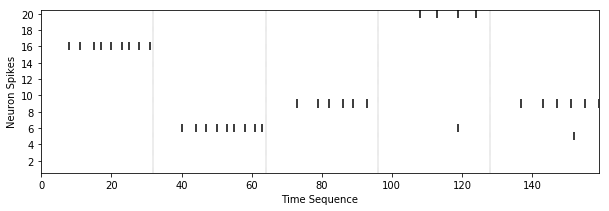

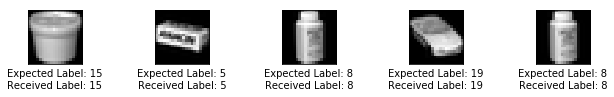

In [10]:
from nxsdk.utils.plotutils import plotSpikeRaster
ax = plt.figure(figsize=(10,3)).gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.axis([0,model.modelParams.timestepPerImage*numInfer,0,model.numCx])

plt.xlabel('Time Sequence')
plt.ylabel('Neuron Spikes')

# mark time step for each image 
for i in range(numInfer):
    plt.axvline(i*model.modelParams.timestepPerImage, color='k', linewidth=0.2, linestyle='--')
    
# plot spike raster
spike = []
for i in range(model.numCx):
    spike.append([])
    spike[i] = model.probeSpikes[i].data[-model.modelParams.timestepPerImage * numInfer:]
plotSpikeRaster(spike)

# plot inference images
plt.figure(figsize=(11,1))  
for i in range(numInfer):
    plt.subplot(1, numInfer, i+1)
    plt.imshow(inferImageSet[i],cmap='gray')
    plt.xticks([],[])
    plt.yticks([],[])
    plt.xlabel("Expected Label: {}\nReceived Label: {}".format(inferLabelSet[i], receivedLabel[i]))

plt.show()

## 8. Inference accuracy evolves with number of training images
We can run different sets of training images which contains different numbers of images. Generally, the more number of images being trained, the better the inference accuracy will be.

The example below illustrates the relationship between inference accuracy and the number of training imanges (setup takes a while due to slow spike IO).

Uncomment the cells below to execute

In [33]:
# from nxsdk.logutils.nxlogging import set_verbosity, LoggingLevel
# set_verbosity(LoggingLevel.WARNING)
# import time

# maxTrnImgs = len(trainLabelData)
# stride = 120
# runs = 5
# maxInferImgs = len(inferLabelData)
# accuracy = np.zeros((int(maxTrnImgs/stride),runs))

# iter = 1
# for n in range(stride, maxTrnImgs+stride, stride):
#     print('Training %d images...')
#     tStartBatch = time.time()
#     for trial in range (runs):
#         print('  Trial %d:'%(trial))
#         i = random.randint(0, maxTrnImgs)
#         if i+n>=maxTrnImgs:
#             trainLabelSet = np.append(trainLabelData[i:], trainLabelData[:i+n-maxTrnImgs], axis=0)
#             trainImageSet = np.append(trainImageData[i:], trainImageData[:i+n-maxTrnImgs], axis=0)
#         else:
#             trainLabelSet = trainLabelData[i:i+n]
#             trainImageSet = trainImageData[i:i+n]

        
#         t = time.time()
#         print('    Configuring... ', end='')
#         model = SlicNet(trainLabelData=trainLabelSet,
#                         trainImageData=trainImageSet,
#                         inferLabelData=inferLabelData,
#                         inferImageData=inferImageData)
    
#         model.configureCx()
#         model.configureConnectivity()
#         model.compileNetwork()
#         print('Done (%d.0 s)'%(time.time()-t))
        
#         t = time.time()
#         print('    Training... ', end='')
#         model.runTraining()
#         print('Done (%d.0 s)'%(time.time()-t))
        
#         t = time.time()
#         print('    Testing... ', end='')
#         model.runInference()
#         print('Done (%d.0 s)'%(time.time()-t))
        
#         model.board.disconnect()
        
#         accuracy[int(n/stride-1),trial] = model.numCorrect/maxInferImgs
    
#     tEndBatch = time.time()
#     print('  Done (%d s)'%(tEndBatch-tStartBatch))

Training %d images...
  Trial 0:
    Configuring... Processing Training Images
Training 120 images 
Compiling the Network
Setting up Activity Probes
Creating Snips and Channels
Done (16.0 s)
    Training... Num iterations is :  2
Completed Iteration :  0s... s... 
Completed Iteration :  1s... s... 
Training Complete Now. Time for Inference
Done (4.0 s)
PASS: Expected label=16 Received label=16 

Completed Inferring 1 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 2 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 3 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 4 Image
FAIL: Expected label=11 Received label=13 

Completed Inferring 5 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 6 Image
FAIL: Expected label=19 Received label=5 

Completed Inferring 7 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 8 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 9 Image
FA

PASS: Expected label=17 Received label=17 

Completed Inferring 113 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 114 Image
FAIL: Expected label=8 Received label=14 

Completed Inferring 115 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 116 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 117 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 118 Image
FAIL: Expected label=2 Received label=3 

Completed Inferring 119 Image
FAIL: Expected label=5 Received label=3 

Completed Inferring 120 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 121 Image
FAIL: Expected label=8 Received label=4 

Completed Inferring 122 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 123 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 124 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 125 Image
PASS: Expected label=17 Received labe

FAIL: Expected label=1 Received label=14 

Completed Inferring 227 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 228 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 229 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 230 Image
FAIL: Expected label=8 Received label=4 

Completed Inferring 231 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 232 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 233 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 234 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 235 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 236 Image
FAIL: Expected label=20 Received label=18 

Completed Inferring 237 Image
FAIL: Expected label=11 Received label=13 

Completed Inferring 238 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 239 Image
PASS: Expected label=7 Received label=7 

Compl

FAIL: Expected label=5 Received label=3 

Completed Inferring 341 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 342 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 343 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 344 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 345 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 346 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 347 Image
FAIL: Expected label=5 Received label=3 

Completed Inferring 348 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 349 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 350 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 351 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 352 Image
FAIL: Expected label=5 Received label=3 

Completed Inferring 353 Image
FAIL: Expected label=2 Received label=16 

Completed

FAIL: Expected label=9 Received label=4 

Completed Inferring 457 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 458 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 459 Image
FAIL: Expected label=9 Received label=3 

Completed Inferring 460 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 461 Image
FAIL: Expected label=2 Received label=13 

Completed Inferring 462 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 463 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 464 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 465 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 466 Image
FAIL: Expected label=1 Received label=14 

Completed Inferring 467 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 468 Image
FAIL: Expected label=7 Received label=16 

Completed Inferring 469 Image
PASS: Expected label=11 Received label=11 

Compl

FAIL: Expected label=6 Received label=3 

Completed Inferring 569 Image
FAIL: Expected label=1 Received label=4 

Completed Inferring 570 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 571 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 572 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 573 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 574 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 575 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 576 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 577 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 578 Image
FAIL: Expected label=5 Received label=14 

Completed Inferring 579 Image
FAIL: Expected label=19 Received label=3 

Completed Inferring 580 Image
FAIL: Expected label=20 Received label=18 

Completed Inferring 581 Image
PASS: Expected label=10 Received label

PASS: Expected label=16 Received label=16 

Completed Inferring 682 Image
FAIL: Expected label=1 Received label=14 

Completed Inferring 683 Image
FAIL: Expected label=2 Received label=4 

Completed Inferring 684 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 685 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 686 Image
FAIL: Expected label=19 Received label=3 

Completed Inferring 687 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 688 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 689 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 690 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 691 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 692 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 693 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 694 Image
PASS: Expected label=12 Received label=1

FAIL: Expected label=4 Received label=7 

Completed Inferring 71 Image
FAIL: Expected label=2 Received label=7 

Completed Inferring 72 Image
FAIL: Expected label=16 Received label=7 

Completed Inferring 73 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 74 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 75 Image
FAIL: Expected label=5 Received label=3 

Completed Inferring 76 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 77 Image
FAIL: Expected label=5 Received label=3 

Completed Inferring 78 Image
FAIL: Expected label=4 Received label=7 

Completed Inferring 79 Image
FAIL: Expected label=5 Received label=7 

Completed Inferring 80 Image
FAIL: Expected label=19 Received label=3 

Completed Inferring 81 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 82 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 83 Image
FAIL: Expected label=4 Received label=7 

Completed Inferring 84 Image


FAIL: Expected label=2 Received label=7 

Completed Inferring 186 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 187 Image
FAIL: Expected label=19 Received label=1 

Completed Inferring 188 Image
FAIL: Expected label=19 Received label=3 

Completed Inferring 189 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 190 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 191 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 192 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 193 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 194 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 195 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 196 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 197 Image
FAIL: Expected label=19 Received label=3 

Completed Inferring 198 Image
PASS: Expected label=1 Received label=1 

Completed

PASS: Expected label=17 Received label=17 

Completed Inferring 299 Image
FAIL: Expected label=9 Received label=7 

Completed Inferring 300 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 301 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 302 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 303 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 304 Image
FAIL: Expected label=9 Received label=7 

Completed Inferring 305 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 306 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 307 Image
FAIL: Expected label=16 Received label=7 

Completed Inferring 308 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 309 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 310 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 311 Image
PASS: Expected label=9 Received label=9 

Completed

PASS: Expected label=14 Received label=14 

Completed Inferring 414 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 415 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 416 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 417 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 418 Image
FAIL: Expected label=20 Received label=3 

Completed Inferring 419 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 420 Image
FAIL: Expected label=16 Received label=7 

Completed Inferring 421 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 422 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 423 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 424 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 425 Image
FAIL: Expected label=4 Received label=7 

Completed Inferring 426 Image
PASS: Expected label=17 Received

FAIL: Expected label=16 Received label=7 

Completed Inferring 528 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 529 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 530 Image
FAIL: Expected label=20 Received label=3 

Completed Inferring 531 Image
FAIL: Expected label=19 Received label=3 

Completed Inferring 532 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 533 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 534 Image
FAIL: Expected label=19 Received label=1 

Completed Inferring 535 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 536 Image
FAIL: Expected label=2 Received label=7 

Completed Inferring 537 Image
FAIL: Expected label=2 Received label=1 

Completed Inferring 538 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 539 Image
FAIL: Expected label=2 Received label=7 

Completed Inferring 540 Image
PASS: Expected label=18 Received label=18 

Complete

PASS: Expected label=13 Received label=13 

Completed Inferring 644 Image
FAIL: Expected label=11 Received label=13 

Completed Inferring 645 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 646 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 647 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 648 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 649 Image
FAIL: Expected label=8 Received label=7 

Completed Inferring 650 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 651 Image
FAIL: Expected label=4 Received label=7 

Completed Inferring 652 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 653 Image
FAIL: Expected label 14 No Spikes! Object not recognized

Completed Inferring 654 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 655 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 656 Image
FAIL: Expected label=4 Received 

PASS: Expected label=15 Received label=15 

Completed Inferring 35 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 36 Image
FAIL: Expected label=6 Received label=5 

Completed Inferring 37 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 38 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 39 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 40 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 41 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 42 Image
FAIL: Expected label=6 Received label=5 

Completed Inferring 43 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 44 Image
FAIL: Expected label=20 Received label=3 

Completed Inferring 45 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 46 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 47 Image
FAIL: Expected label=8 Received label=16 

Completed Infer

PASS: Expected label=14 Received label=14 

Completed Inferring 152 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 153 Image
FAIL: Expected label=10 Received label=12 

Completed Inferring 154 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 155 Image
FAIL: Expected label=2 Received label=5 

Completed Inferring 156 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 157 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 158 Image
FAIL: Expected label=19 Received label=5 

Completed Inferring 159 Image
FAIL: Expected label=19 Received label=5 

Completed Inferring 160 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 161 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 162 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 163 Image
FAIL: Expected label=8 Received label=16 

Completed Inferring 164 Image
PASS: Expected label=10 Received label=10 

Com

PASS: Expected label=16 Received label=16 

Completed Inferring 264 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 265 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 266 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 267 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 268 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 269 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 270 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 271 Image
FAIL: Expected label=19 Received label=5 

Completed Inferring 272 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 273 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 274 Image
FAIL: Expected label=19 Received label=5 

Completed Inferring 275 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 276 Image
PASS: Expected label=18 Received label=18 

Comp

FAIL: Expected label=8 Received label=16 

Completed Inferring 381 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 382 Image
FAIL: Expected label=3 Received label=5 

Completed Inferring 383 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 384 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 385 Image
FAIL: Expected label=6 Received label=5 

Completed Inferring 386 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 387 Image
FAIL: Expected label=3 Received label=5 

Completed Inferring 388 Image
FAIL: Expected label=7 Received label=15 

Completed Inferring 389 Image
FAIL: Expected label=2 Received label=5 

Completed Inferring 390 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 391 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 392 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 393 Image
PASS: Expected label=14 Received label=14 

Completed 

PASS: Expected label=4 Received label=4 

Completed Inferring 494 Image
FAIL: Expected label=9 Received label=5 

Completed Inferring 495 Image
FAIL: Expected label=4 Received label=16 

Completed Inferring 496 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 497 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 498 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 499 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 500 Image
FAIL: Expected label=4 Received label=1 

Completed Inferring 501 Image
FAIL: Expected label=3 Received label=5 

Completed Inferring 502 Image
FAIL: Expected label=6 Received label=5 

Completed Inferring 503 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 504 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 505 Image
FAIL: Expected label=7 Received label=16 

Completed Inferring 506 Image
PASS: Expected label=5 Received label=5 

Completed

FAIL: Expected label=8 Received label=16 

Completed Inferring 606 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 607 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 608 Image
FAIL: Expected label=20 Received label=3 

Completed Inferring 609 Image
FAIL: Expected label=9 Received label=5 

Completed Inferring 610 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 611 Image
FAIL: Expected label=3 Received label=13 

Completed Inferring 612 Image
FAIL: Expected label=8 Received label=16 

Completed Inferring 613 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 614 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 615 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 616 Image
FAIL: Expected label=7 Received label=15 

Completed Inferring 617 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 618 Image
FAIL: Expected label=7 Received label=13 

Comp

PASS: Expected label=17 Received label=17 

Completed Inferring 720 Image
Inference Complete : Accuracy is 0.6166666666666667
Done (24.0 s)
  Trial 3:
    Configuring... Processing Training Images
Training 120 images 
Compiling the Network
Setting up Activity Probes
Creating Snips and Channels
Done (15.0 s)
    Training... Num iterations is :  2
Completed Iteration :  0s... s... 
Completed Iteration :  1s... s... 
Training Complete Now. Time for Inference
Done (4.0 s)
FAIL: Expected label=16 Received label=8 

Completed Inferring 1 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 2 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 3 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 4 Image
FAIL: Expected label=11 Received label=8 

Completed Inferring 5 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 6 Image
FAIL: Expected label=19 Received label=5 

Completed Inferring 7 Image
PASS: Expected label=18 Rece

PASS: Expected label=17 Received label=17 

Completed Inferring 113 Image
FAIL: Expected label=11 Received label=8 

Completed Inferring 114 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 115 Image
FAIL: Expected label=20 Received label=10 

Completed Inferring 116 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 117 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 118 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 119 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 120 Image
FAIL: Expected label=1 Received label=2 

Completed Inferring 121 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 122 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 123 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 124 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 125 Image
PASS: Expected label=17 Received label=17 

Completed

FAIL: Expected label 1 No Spikes! Object not recognized

Completed Inferring 227 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 228 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 229 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 230 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 231 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 232 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 233 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 234 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 235 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 236 Image
FAIL: Expected label=20 Received label=10 

Completed Inferring 237 Image
FAIL: Expected label=11 Received label=8 

Completed Inferring 238 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 239 Image
PASS: Expected label=7 Received la

FAIL: Expected label=20 Received label=18 

Completed Inferring 338 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 339 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 340 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 341 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 342 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 343 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 344 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 345 Image
FAIL: Expected label 11 No Spikes! Object not recognized

Completed Inferring 346 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 347 Image
FAIL: Expected label=5 Received label=2 

Completed Inferring 348 Image
FAIL: Expected label=16 Received label=8 

Completed Inferring 349 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 350 Image
PASS: Expected label=15 Received label=

FAIL: Expected label=20 Received label=10 

Completed Inferring 455 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 456 Image
FAIL: Expected label=9 Received label=2 

Completed Inferring 457 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 458 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 459 Image
FAIL: Expected label=9 Received label=5 

Completed Inferring 460 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 461 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 462 Image
FAIL: Expected label=4 Received label=8 

Completed Inferring 463 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 464 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 465 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 466 Image
FAIL: Expected label=1 Received label=2 

Completed Inferring 467 Image
PASS: Expected label=10 Received label=10 

Comple

PASS: Expected label=6 Received label=6 

Completed Inferring 569 Image
FAIL: Expected label=1 Received label=8 

Completed Inferring 570 Image
FAIL: Expected label=3 Received label=2 

Completed Inferring 571 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 572 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 573 Image
FAIL: Expected label=1 Received label=2 

Completed Inferring 574 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 575 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 576 Image
FAIL: Expected label=6 Received label=5 

Completed Inferring 577 Image
FAIL: Expected label=20 Received label=10 

Completed Inferring 578 Image
FAIL: Expected label=5 Received label=2 

Completed Inferring 579 Image
FAIL: Expected label=19 Received label=2 

Completed Inferring 580 Image
FAIL: Expected label=20 Received label=10 

Completed Inferring 581 Image
PASS: Expected label=10 Received label=10 

Completed

PASS: Expected label=17 Received label=17 

Completed Inferring 686 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 687 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 688 Image
FAIL: Expected label=20 Received label=10 

Completed Inferring 689 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 690 Image
FAIL: Expected label=9 Received label=5 

Completed Inferring 691 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 692 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 693 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 694 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 695 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 696 Image
FAIL: Expected label=16 Received label=8 

Completed Inferring 697 Image
FAIL: Expected label=2 Received label=8 

Completed Inferring 698 Image
PASS: Expected label=15 Received label=15 

Completed 

FAIL: Expected label=5 Received label=9 

Completed Inferring 76 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 77 Image
FAIL: Expected label=5 Received label=6 

Completed Inferring 78 Image
FAIL: Expected label=4 Received label=8 

Completed Inferring 79 Image
FAIL: Expected label=5 Received label=6 

Completed Inferring 80 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 81 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 82 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 83 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 84 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 85 Image
FAIL: Expected label=16 Received label=8 

Completed Inferring 86 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 87 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 88 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 89 Imag

FAIL: Expected label=15 Received label=8 

Completed Inferring 191 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 192 Image
FAIL: Expected label=11 Received label=8 

Completed Inferring 193 Image
FAIL: Expected label=3 Received label=6 

Completed Inferring 194 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 195 Image
FAIL: Expected label=3 Received label=6 

Completed Inferring 196 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 197 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 198 Image
FAIL: Expected label=1 Received label=6 

Completed Inferring 199 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 200 Image
FAIL: Expected label=15 Received label=8 

Completed Inferring 201 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 202 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 203 Image
FAIL: Expected label=3 Received label=6 

PASS: Expected label=1 Received label=1 

Completed Inferring 306 Image
FAIL: Expected label=15 Received label=8 

Completed Inferring 307 Image
FAIL: Expected label=16 Received label=8 

Completed Inferring 308 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 309 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 310 Image
FAIL: Expected label=13 Received label=8 

Completed Inferring 311 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 312 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 313 Image
FAIL: Expected label=16 Received label=8 

Completed Inferring 314 Image
FAIL: Expected label=14 Received label=8 

Completed Inferring 315 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 316 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 317 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 318 Image
PASS: Expected label=1 Received label=1 

Comple

FAIL: Expected label=1 Received label=8 

Completed Inferring 422 Image
FAIL: Expected label 13 No Spikes! Object not recognized

Completed Inferring 423 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 424 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 425 Image
FAIL: Expected label=4 Received label=8 

Completed Inferring 426 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 427 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 428 Image
FAIL: Expected label=2 Received label=8 

Completed Inferring 429 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 430 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 431 Image
FAIL: Expected label=4 Received label=8 

Completed Inferring 432 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 433 Image
FAIL: Expected label=15 Received label=8 

Completed Inferring 434 Image
FAIL: Expected label=14 Received label

PASS: Expected label=13 Received label=13 

Completed Inferring 536 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 537 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 538 Image
FAIL: Expected label=7 Received label=8 

Completed Inferring 539 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 540 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 541 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 542 Image
FAIL: Expected label=14 Received label=8 

Completed Inferring 543 Image
FAIL: Expected label=4 Received label=8 

Completed Inferring 544 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 545 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 546 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 547 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 548 Image
FAIL: Expected label=7 Received label=8 

Completed Infe

PASS: Expected label=17 Received label=17 

Completed Inferring 648 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 649 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 650 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 651 Image
FAIL: Expected label=4 Received label=8 

Completed Inferring 652 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 653 Image
FAIL: Expected label=14 Received label=8 

Completed Inferring 654 Image
FAIL: Expected label=3 Received label=6 

Completed Inferring 655 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 656 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 657 Image
FAIL: Expected label=5 Received label=6 

Completed Inferring 658 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 659 Image
FAIL: Expected label=2 Received label=8 

Completed Inferring 660 Image
FAIL: Expected label=16 Received label=8 

Completed 

PASS: Expected label=5 Received label=5 

Completed Inferring 148 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 149 Image
FAIL: Expected label=4 Received label=8 

Completed Inferring 150 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 151 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 152 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 153 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 154 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 155 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 156 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 157 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 158 Image
FAIL: Expected label=19 Received label=2 

Completed Inferring 159 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 160 Image
PASS: Expected label=16 Received label=16 

Compl

PASS: Expected label=16 Received label=16 

Completed Inferring 264 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 265 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 266 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 267 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 268 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 269 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 270 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 271 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 272 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 273 Image
FAIL: Expected label=1 Received label=2 

Completed Inferring 274 Image
FAIL: Expected label=19 Received label=2 

Completed Inferring 275 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 276 Image
PASS: Expected label=18 Received label=18 

Com

FAIL: Expected label=7 Received label=8 

Completed Inferring 378 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 379 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 380 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 381 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 382 Image
FAIL: Expected label=3 Received label=13 

Completed Inferring 383 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 384 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 385 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 386 Image
FAIL: Expected label=9 Received label=5 

Completed Inferring 387 Image
FAIL: Expected label=3 Received label=19 

Completed Inferring 388 Image
FAIL: Expected label=7 Received label=15 

Completed Inferring 389 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 390 Image
PASS: Expected label=12 Received label=12 

Complete

FAIL: Expected label=4 Received label=8 

Completed Inferring 491 Image
FAIL: Expected label=6 Received label=1 

Completed Inferring 492 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 493 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 494 Image
FAIL: Expected label=9 Received label=5 

Completed Inferring 495 Image
FAIL: Expected label=4 Received label=8 

Completed Inferring 496 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 497 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 498 Image
FAIL: Expected label=19 Received label=18 

Completed Inferring 499 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 500 Image
FAIL: Expected label=4 Received label=2 

Completed Inferring 501 Image
FAIL: Expected label=3 Received label=5 

Completed Inferring 502 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 503 Image
PASS: Expected label=17 Received label=17 

Completed

PASS: Expected label=19 Received label=19 

Completed Inferring 605 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 606 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 607 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 608 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 609 Image
FAIL: Expected label=9 Received label=5 

Completed Inferring 610 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 611 Image
FAIL: Expected label=3 Received label=13 

Completed Inferring 612 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 613 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 614 Image
FAIL: Expected label=16 Received label=8 

Completed Inferring 615 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 616 Image
FAIL: Expected label=7 Received label=15 

Completed Inferring 617 Image
PASS: Expected label=14 Received l

FAIL: Expected label=19 Received label=6 

Completed Inferring 719 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 720 Image
Inference Complete : Accuracy is 0.7416666666666667
Done (25.0 s)
  Trial 1:
    Configuring... Processing Training Images
Training 240 images 
Compiling the Network
Setting up Activity Probes
Creating Snips and Channels
Done (115.0 s)
    Training... Num iterations is :  2
Completed Iteration :  0s... s... 
Completed Iteration :  1s... s... 
Training Complete Now. Time for Inference
Done (9.0 s)
PASS: Expected label=16 Received label=16 

Completed Inferring 1 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 2 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 3 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 4 Image
FAIL: Expected label=11 Received label=13 

Completed Inferring 5 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 6 Image
FAIL: Expected label=19

PASS: Expected label=4 Received label=4 

Completed Inferring 111 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 112 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 113 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 114 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 115 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 116 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 117 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 118 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 119 Image
FAIL: Expected label=5 Received label=9 

Completed Inferring 120 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 121 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 122 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 123 Image
PASS: Expected label=12 Received label=1

PASS: Expected label=8 Received label=8 

Completed Inferring 225 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 226 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 227 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 228 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 229 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 230 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 231 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 232 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 233 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 234 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 235 Image
FAIL: Expected label=3 Received label=6 

Completed Inferring 236 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 237 Image
FAIL: Expected label=11 Received label

FAIL: Expected label=11 Received label=12 

Completed Inferring 337 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 338 Image
FAIL: Expected label=8 Received label=12 

Completed Inferring 339 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 340 Image
FAIL: Expected label=5 Received label=6 

Completed Inferring 341 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 342 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 343 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 344 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 345 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 346 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 347 Image
FAIL: Expected label=5 Received label=6 

Completed Inferring 348 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 349 Image
PASS: Expected label=9 Received lab

PASS: Expected label=9 Received label=9 

Completed Inferring 451 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 452 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 453 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 454 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 455 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 456 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 457 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 458 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 459 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 460 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 461 Image
FAIL: Expected label=2 Received label=9 

Completed Inferring 462 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 463 Image
PASS: Expected label=12 Received lab

FAIL: Expected label=19 Received label=6 

Completed Inferring 567 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 568 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 569 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 570 Image
FAIL: Expected label 3 No Spikes! Object not recognized

Completed Inferring 571 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 572 Image
FAIL: Expected label=5 Received label=9 

Completed Inferring 573 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 574 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 575 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 576 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 577 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 578 Image
FAIL: Expected label=5 Received label=2 

Completed Inferring 579 Image
FAIL: Expected label=19 R

PASS: Expected label=8 Received label=8 

Completed Inferring 679 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 680 Image
FAIL: Expected label=3 Received label=6 

Completed Inferring 681 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 682 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 683 Image
FAIL: Expected label=2 Received label=8 

Completed Inferring 684 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 685 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 686 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 687 Image
FAIL: Expected label=3 Received label=6 

Completed Inferring 688 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 689 Image
FAIL: Expected label=3 Received label=6 

Completed Inferring 690 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 691 Image
FAIL: Expected label=3 Received label=6

PASS: Expected label=15 Received label=15 

Completed Inferring 69 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 70 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 71 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 72 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 73 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 74 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 75 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 76 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 77 Image
FAIL: Expected label=5 Received label=19 

Completed Inferring 78 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 79 Image
FAIL: Expected label=5 Received label=9 

Completed Inferring 80 Image
FAIL: Expected label 19 No Spikes! Object not recognized

Completed Inferring 81 Image
PASS: Expected label=6 Received label=6 

Completed 

FAIL: Expected label=20 Received label=11 

Completed Inferring 183 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 184 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 185 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 186 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 187 Image
FAIL: Expected label 19 No Spikes! Object not recognized

Completed Inferring 188 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 189 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 190 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 191 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 192 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 193 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 194 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 195 Image
PASS: Expected label=3 Received

PASS: Expected label=10 Received label=10 

Completed Inferring 298 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 299 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 300 Image
FAIL: Expected label=3 Received label=13 

Completed Inferring 301 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 302 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 303 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 304 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 305 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 306 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 307 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 308 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 309 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 310 Image
PASS: Expected label=13 Received label=13 

Compl

PASS: Expected label=14 Received label=14 

Completed Inferring 414 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 415 Image
FAIL: Expected label=20 Received label=11 

Completed Inferring 416 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 417 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 418 Image
FAIL: Expected label=20 Received label=11 

Completed Inferring 419 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 420 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 421 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 422 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 423 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 424 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 425 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 426 Image
PASS: Expected label=17 Received label=17 



PASS: Expected label=16 Received label=16 

Completed Inferring 528 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 529 Image
FAIL: Expected label=7 Received label=13 

Completed Inferring 530 Image
FAIL: Expected label=20 Received label=11 

Completed Inferring 531 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 532 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 533 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 534 Image
FAIL: Expected label=19 Received label=9 

Completed Inferring 535 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 536 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 537 Image
FAIL: Expected label=2 Received label=15 

Completed Inferring 538 Image
FAIL: Expected label=7 Received label=13 

Completed Inferring 539 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 540 Image
PASS: Expected label=18 Received label=18 

Co

PASS: Expected label=13 Received label=13 

Completed Inferring 644 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 645 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 646 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 647 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 648 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 649 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 650 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 651 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 652 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 653 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 654 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 655 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 656 Image
PASS: Expected label=4 Received label=4 

Comp

PASS: Expected label=14 Received label=14 

Completed Inferring 33 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 34 Image
FAIL: Expected label=15 Received label=2 

Completed Inferring 35 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 36 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 37 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 38 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 39 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 40 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 41 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 42 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 43 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 44 Image
FAIL: Expected label=20 Received label=3 

Completed Inferring 45 Image
FAIL: Expected label 15 No Spikes! Object not recognized


PASS: Expected label=4 Received label=4 

Completed Inferring 149 Image
FAIL: Expected label=4 Received label=2 

Completed Inferring 150 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 151 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 152 Image
FAIL: Expected label 15 No Spikes! Object not recognized

Completed Inferring 153 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 154 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 155 Image
FAIL: Expected label=2 Received label=9 

Completed Inferring 156 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 157 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 158 Image
FAIL: Expected label=19 Received label=9 

Completed Inferring 159 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 160 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 161 Image
PASS: Expected label=3 Received la

FAIL: Expected label=5 Received label=3 

Completed Inferring 265 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 266 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 267 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 268 Image
FAIL: Expected label=5 Received label=18 

Completed Inferring 269 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 270 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 271 Image
FAIL: Expected label=19 Received label=3 

Completed Inferring 272 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 273 Image
FAIL: Expected label=1 Received label=2 

Completed Inferring 274 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 275 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 276 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 277 Image
PASS: Expected label=13 Received label=13 

Com

PASS: Expected label=8 Received label=8 

Completed Inferring 381 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 382 Image
FAIL: Expected label=3 Received label=7 

Completed Inferring 383 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 384 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 385 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 386 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 387 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 388 Image
FAIL: Expected label=7 Received label=2 

Completed Inferring 389 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 390 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 391 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 392 Image
FAIL: Expected label=5 Received label=3 

Completed Inferring 393 Image
PASS: Expected label=14 Received label=14 

Completed In

PASS: Expected label=4 Received label=4 

Completed Inferring 496 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 497 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 498 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 499 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 500 Image
FAIL: Expected label=4 Received label=2 

Completed Inferring 501 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 502 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 503 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 504 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 505 Image
FAIL: Expected label=7 Received label=2 

Completed Inferring 506 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 507 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 508 Image
PASS: Expected label=11 Received label=11 

Completed

FAIL: Expected label=3 Received label=13 

Completed Inferring 612 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 613 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 614 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 615 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 616 Image
FAIL: Expected label=7 Received label=9 

Completed Inferring 617 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 618 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 619 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 620 Image
FAIL: Expected label=20 Received label=3 

Completed Inferring 621 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 622 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 623 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 624 Image
PASS: Expected label=12 Received label=12 

Complete

Creating Snips and Channels
Done (15.0 s)
    Training... Num iterations is :  2
Completed Iteration :  0s... s... 
Completed Iteration :  1s... s... 
Training Complete Now. Time for Inference
Done (9.0 s)
PASS: Expected label=16 Received label=16 

Completed Inferring 1 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 2 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 3 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 4 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 5 Image
FAIL: Expected label=6 Received label=5 

Completed Inferring 6 Image
FAIL: Expected label=19 Received label=5 

Completed Inferring 7 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 8 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 9 Image
FAIL: Expected label=6 Received label=5 

Completed Inferring 10 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 11 Image
PASS: E

FAIL: Expected label=9 Received label=5 

Completed Inferring 112 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 113 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 114 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 115 Image
FAIL: Expected label=20 Received label=1 

Completed Inferring 116 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 117 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 118 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 119 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 120 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 121 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 122 Image
FAIL: Expected label=4 Received label=16 

Completed Inferring 123 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 124 Image
FAIL: Expected label=3 Received label=5 

Completed 

PASS: Expected label=8 Received label=8 

Completed Inferring 225 Image
FAIL: Expected label=1 Received label=14 

Completed Inferring 226 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 227 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 228 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 229 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 230 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 231 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 232 Image
FAIL: Expected label=6 Received label=5 

Completed Inferring 233 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 234 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 235 Image
FAIL: Expected label=3 Received label=6 

Completed Inferring 236 Image
FAIL: Expected label=20 Received label=1 

Completed Inferring 237 Image
PASS: Expected label=11 Received label=11 

Complete

PASS: Expected label=11 Received label=11 

Completed Inferring 337 Image
FAIL: Expected label=20 Received label=18 

Completed Inferring 338 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 339 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 340 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 341 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 342 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 343 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 344 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 345 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 346 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 347 Image
FAIL: Expected label=5 Received label=1 

Completed Inferring 348 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 349 Image
PASS: Expected label=9 Received label=9 

Complete

PASS: Expected label=16 Received label=16 

Completed Inferring 453 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 454 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 455 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 456 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 457 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 458 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 459 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 460 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 461 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 462 Image
FAIL: Expected label 4 No Spikes! Object not recognized

Completed Inferring 463 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 464 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 465 Image
PASS: Expected labe

FAIL: Expected label=19 Received label=5 

Completed Inferring 568 Image
FAIL: Expected label=6 Received label=5 

Completed Inferring 569 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 570 Image
FAIL: Expected label=3 Received label=5 

Completed Inferring 571 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 572 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 573 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 574 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 575 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 576 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 577 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 578 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 579 Image
FAIL: Expected label=19 Received label=5 

Completed Inferring 580 Image
FAIL: Expected label 20 No Spikes! Objec

PASS: Expected label=8 Received label=8 

Completed Inferring 679 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 680 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 681 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 682 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 683 Image
FAIL: Expected label=2 Received label=16 

Completed Inferring 684 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 685 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 686 Image
FAIL: Expected label=19 Received label=5 

Completed Inferring 687 Image
FAIL: Expected label=3 Received label=5 

Completed Inferring 688 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 689 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 690 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 691 Image
PASS: Expected label=3 Received label=

FAIL: Expected label=7 Received label=4 

Completed Inferring 65 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 66 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 67 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 68 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 69 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 70 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 71 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 72 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 73 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 74 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 75 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 76 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 77 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 7

PASS: Expected label=18 Received label=18 

Completed Inferring 179 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 180 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 181 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 182 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 183 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 184 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 185 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 186 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 187 Image
FAIL: Expected label=19 Received label=3 

Completed Inferring 188 Image
FAIL: Expected label=19 Received label=5 

Completed Inferring 189 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 190 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 191 Image
FAIL: Expected label=6 Received la

PASS: Expected label=17 Received label=17 

Completed Inferring 292 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 293 Image
FAIL: Expected label=2 Received label=4 

Completed Inferring 294 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 295 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 296 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 297 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 298 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 299 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 300 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 301 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 302 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 303 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 304 Image
PASS: Expected label=9 Received label=9 

Completed 

PASS: Expected label=13 Received label=13 

Completed Inferring 513 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 514 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 515 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 516 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 517 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 518 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 519 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 520 Image
FAIL: Expected label=7 Received label=14 

Completed Inferring 521 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 522 Image
FAIL: Expected label=2 Received label=4 

Completed Inferring 523 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 524 Image
FAIL: Expected label=11 Received label=8 

Completed Inferring 525 Image
PASS: Expected label=12 Received label=12 

Completed Infe

FAIL: Expected label=6 Received label=3 

Completed Inferring 627 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 628 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 629 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 630 Image
FAIL: Expected label=19 Received label=7 

Completed Inferring 631 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 632 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 633 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 634 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 635 Image
FAIL: Expected label=13 Received label=10 

Completed Inferring 636 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 637 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 638 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 639 Image
PASS: Expected label=10 Received label=10 

Completed 

PASS: Expected label=17 Received label=17 

Completed Inferring 19 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 20 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 21 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 22 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 23 Image
FAIL: Expected label=4 Received label=8 

Completed Inferring 24 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 25 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 26 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 27 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 28 Image
FAIL: Expected label=20 Received label=18 

Completed Inferring 29 Image
FAIL: Expected label=6 Received label=18 

Completed Inferring 30 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 31 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 

PASS: Expected label=5 Received label=5 

Completed Inferring 133 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 134 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 135 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 136 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 137 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 138 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 139 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 140 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 141 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 142 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 143 Image
FAIL: Expected label=20 Received label=18 

Completed Inferring 144 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 145 Image
FAIL: Expected label=4 Received label=8 

Comple

PASS: Expected label=13 Received label=13 

Completed Inferring 250 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 251 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 252 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 253 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 254 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 255 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 256 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 257 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 258 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 259 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 260 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 261 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 262 Image
FAIL: Expected label 4 No Spikes! Object not 

FAIL: Expected label=2 Received label=5 

Completed Inferring 365 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 366 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 367 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 368 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 369 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 370 Image
FAIL: Expected label=20 Received label=3 

Completed Inferring 371 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 372 Image
FAIL: Expected label=3 Received label=7 

Completed Inferring 373 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 374 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 375 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 376 Image
FAIL: Expected label=2 Received label=5 

Completed Inferring 377 Image
PASS: Expected label=7 Received label=7 



PASS: Expected label=9 Received label=9 

Completed Inferring 481 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 482 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 483 Image
FAIL: Expected label=20 Received label=18 

Completed Inferring 484 Image
FAIL: Expected label=4 Received label=8 

Completed Inferring 485 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 486 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 487 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 488 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 489 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 490 Image
FAIL: Expected label 4 No Spikes! Object not recognized

Completed Inferring 491 Image
FAIL: Expected label=6 Received label=5 

Completed Inferring 492 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 493 Image
PASS: Expected label=4 Received l

PASS: Expected label=16 Received label=16 

Completed Inferring 597 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 598 Image
FAIL: Expected label 10 No Spikes! Object not recognized

Completed Inferring 599 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 600 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 601 Image
FAIL: Expected label=16 Received label=8 

Completed Inferring 602 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 603 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 604 Image
FAIL: Expected label=19 Received label=5 

Completed Inferring 605 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 606 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 607 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 608 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferrin

PASS: Expected label=12 Received label=12 

Completed Inferring 712 Image
FAIL: Expected label=4 Received label=8 

Completed Inferring 713 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 714 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 715 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 716 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 717 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 718 Image
FAIL: Expected label=19 Received label=18 

Completed Inferring 719 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 720 Image
Inference Complete : Accuracy is 0.7805555555555556
Done (24.0 s)
  Trial 2:
    Configuring... Processing Training Images
Training 360 images 
Compiling the Network
Setting up Activity Probes
Creating Snips and Channels
Done (15.0 s)
    Training... Num iterations is :  2
Completed Iteration :  0s... s... 
Completed Iteration :  1s... 

PASS: Expected label=15 Received label=15 

Completed Inferring 100 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 101 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 102 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 103 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 104 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 105 Image
FAIL: Expected label=19 Received label=1 

Completed Inferring 106 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 107 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 108 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 109 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 110 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 111 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 112 Image
PASS: Expected label=17 Received label=17 

Complet

PASS: Expected label=11 Received label=11 

Completed Inferring 213 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 214 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 215 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 216 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 217 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 218 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 219 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 220 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 221 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 222 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 223 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 224 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 225 Image
PASS: Expected labe

PASS: Expected label=12 Received label=12 

Completed Inferring 328 Image
FAIL: Expected label=5 Received label=7 

Completed Inferring 329 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 330 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 331 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 332 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 333 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 334 Image
FAIL: Expected label=7 Received label=9 

Completed Inferring 335 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 336 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 337 Image
FAIL: Expected label=20 Received label=18 

Completed Inferring 338 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 339 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 340 Image
PASS: Expected label=5 Received label=5 

Completed In


Completed Inferring 443 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 444 Image
FAIL: Expected label=20 Received label=18 

Completed Inferring 445 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 446 Image
FAIL: Expected label=2 Received label=4 

Completed Inferring 447 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 448 Image
FAIL: Expected label=4 Received label=11 

Completed Inferring 449 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 450 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 451 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 452 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 453 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 454 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 455 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 456 Image
PA

PASS: Expected label=11 Received label=11 

Completed Inferring 558 Image
FAIL: Expected label=5 Received label=15 

Completed Inferring 559 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 560 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 561 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 562 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 563 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 564 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 565 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 566 Image
FAIL: Expected label=19 Received label=3 

Completed Inferring 567 Image
FAIL: Expected label=19 Received label=3 

Completed Inferring 568 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 569 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 570 Image
PASS: Expected label=3 Received lab

PASS: Expected label=17 Received label=17 

Completed Inferring 672 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 673 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 674 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 675 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 676 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 677 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 678 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 679 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 680 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 681 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 682 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 683 Image
FAIL: Expected label=2 Received label=11 

Completed Inferring 684 Image
PASS: Expected label=17 Received label=17 

Completed I

PASS: Expected label=15 Received label=15 

Completed Inferring 64 Image
FAIL: Expected label=7 Received label=2 

Completed Inferring 65 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 66 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 67 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 68 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 69 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 70 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 71 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 72 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 73 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 74 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 75 Image
FAIL: Expected label=5 Received label=9 

Completed Inferring 76 Image
PASS: Expected label=9 Received label=9 

Completed Inferring

FAIL: Expected label=11 Received label=1 

Completed Inferring 180 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 181 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 182 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 183 Image
FAIL: Expected label 8 No Spikes! Object not recognized

Completed Inferring 184 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 185 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 186 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 187 Image
FAIL: Expected label=19 Received label=1 

Completed Inferring 188 Image
FAIL: Expected label=19 Received label=18 

Completed Inferring 189 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 190 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 191 Image
FAIL: Expected label 6 No Spikes! Object not recognized

Completed Inferring 192 Image
PASS: 

PASS: Expected label=11 Received label=11 

Completed Inferring 406 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 407 Image
FAIL: Expected label=7 Received label=9 

Completed Inferring 408 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 409 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 410 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 411 Image
FAIL: Expected label 19 No Spikes! Object not recognized

Completed Inferring 412 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 413 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 414 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 415 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 416 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 417 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 418 Image
FAIL: Expected la

FAIL: Expected label=8 Received label=2 

Completed Inferring 522 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 523 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 524 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 525 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 526 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 527 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 528 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 529 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 530 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 531 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 532 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 533 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 534 Image
FAIL: Expected label=19 Receive

PASS: Expected label=5 Received label=5 

Completed Inferring 637 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 638 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 639 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 640 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 641 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 642 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 643 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 644 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 645 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 646 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 647 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 648 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 649 Image
PASS: Expected label=8 Received label=8 

Comp

FAIL: Expected label=16 Received label=8 

Completed Inferring 26 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 27 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 28 Image
FAIL: Expected label=20 Received label=18 

Completed Inferring 29 Image
FAIL: Expected label=6 Received label=18 

Completed Inferring 30 Image
FAIL: Expected label=1 Received label=8 

Completed Inferring 31 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 32 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 33 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 34 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 35 Image
FAIL: Expected label=16 Received label=8 

Completed Inferring 36 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 37 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 38 Image
FAIL: Expected label=16 Received label=8 

Completed Inferrin

PASS: Expected label=9 Received label=9 

Completed Inferring 143 Image
FAIL: Expected label=20 Received label=3 

Completed Inferring 144 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 145 Image
FAIL: Expected label=4 Received label=8 

Completed Inferring 146 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 147 Image
FAIL: Expected label=5 Received label=9 

Completed Inferring 148 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 149 Image
FAIL: Expected label=4 Received label=8 

Completed Inferring 150 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 151 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 152 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 153 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 154 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 155 Image
PASS: Expected label=2 Received label=2 

Completed I

PASS: Expected label=9 Received label=9 

Completed Inferring 257 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 258 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 259 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 260 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 261 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 262 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 263 Image
FAIL: Expected label=16 Received label=8 

Completed Inferring 264 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 265 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 266 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 267 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 268 Image
FAIL: Expected label=5 Received label=18 

Completed Inferring 269 Image
FAIL: Expected label=16 Received label=8 

Complet

FAIL: Expected label=6 Received label=19 

Completed Inferring 369 Image
FAIL: Expected label=20 Received label=3 

Completed Inferring 370 Image
FAIL: Expected label=20 Received label=3 

Completed Inferring 371 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 372 Image
FAIL: Expected label=3 Received label=7 

Completed Inferring 373 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 374 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 375 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 376 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 377 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 378 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 379 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 380 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 381 Image
PASS: Expected label=13 Received label=13 

Completed Inf

PASS: Expected label=15 Received label=15 

Completed Inferring 486 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 487 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 488 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 489 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 490 Image
FAIL: Expected label=4 Received label=8 

Completed Inferring 491 Image
FAIL: Expected label=6 Received label=9 

Completed Inferring 492 Image
FAIL: Expected label=16 Received label=8 

Completed Inferring 493 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 494 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 495 Image
FAIL: Expected label=4 Received label=8 

Completed Inferring 496 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 497 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 498 Image
PASS: Expected label=19 Received label=19 

Compl

FAIL: Expected label=16 Received label=8 

Completed Inferring 602 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 603 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 604 Image
FAIL: Expected label=19 Received label=5 

Completed Inferring 605 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 606 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 607 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 608 Image
FAIL: Expected label=20 Received label=3 

Completed Inferring 609 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 610 Image
FAIL: Expected label=16 Received label=8 

Completed Inferring 611 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 612 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 613 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 614 Image
FAIL: Expected label=16 Received label

FAIL: Expected label=19 Received label=18 

Completed Inferring 719 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 720 Image
Inference Complete : Accuracy is 0.7555555555555555
Done (23.0 s)
  Done (271 s)
Training %d images...
  Trial 0:
    Configuring... Processing Training Images
Training 480 images 
Compiling the Network
Setting up Activity Probes
Creating Snips and Channels
Done (15.0 s)
    Training... Num iterations is :  2
Completed Iteration :  0s... s... 
Completed Iteration :  1s... s... 
Training Complete Now. Time for Inference
Done (18.0 s)
PASS: Expected label=16 Received label=16 

Completed Inferring 1 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 2 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 3 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 4 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 5 Image
FAIL: Expected label=6 Received label=19 

Completed In

PASS: Expected label=4 Received label=4 

Completed Inferring 111 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 112 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 113 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 114 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 115 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 116 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 117 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 118 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 119 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 120 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 121 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 122 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 123 Image
PASS: Expected label=12 Received label=1

PASS: Expected label=1 Received label=1 

Completed Inferring 226 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 227 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 228 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 229 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 230 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 231 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 232 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 233 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 234 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 235 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 236 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 237 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 238 Image
PASS: Expected label=11 Received lab

FAIL: Expected label=20 Received label=18 

Completed Inferring 338 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 339 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 340 Image
FAIL: Expected label=5 Received label=9 

Completed Inferring 341 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 342 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 343 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 344 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 345 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 346 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 347 Image
FAIL: Expected label=5 Received label=7 

Completed Inferring 348 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 349 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 350 Image
PASS: Expected label=15 Received label=15 

Complete

PASS: Expected label=10 Received label=10 

Completed Inferring 450 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 451 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 452 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 453 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 454 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 455 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 456 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 457 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 458 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 459 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 460 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 461 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 462 Image
PASS: Expected label=4 Received la

PASS: Expected label=18 Received label=18 

Completed Inferring 566 Image
FAIL: Expected label=19 Received label=3 

Completed Inferring 567 Image
FAIL: Expected label=19 Received label=3 

Completed Inferring 568 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 569 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 570 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 571 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 572 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 573 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 574 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 575 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 576 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 577 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 578 Image
FAIL: Expected label=5 Received label

PASS: Expected label=1 Received label=1 

Completed Inferring 683 Image
FAIL: Expected label=2 Received label=16 

Completed Inferring 684 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 685 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 686 Image
FAIL: Expected label=19 Received label=3 

Completed Inferring 687 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 688 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 689 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 690 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 691 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 692 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 693 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 694 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 695 Image
PASS: Expected label=17 Received label=1

PASS: Expected label=3 Received label=3 

Completed Inferring 75 Image
FAIL: Expected label=5 Received label=18 

Completed Inferring 76 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 77 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 78 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 79 Image
FAIL: Expected label 5 No Spikes! Object not recognized

Completed Inferring 80 Image
FAIL: Expected label=19 Received label=18 

Completed Inferring 81 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 82 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 83 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 84 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 85 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 86 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 87 Image
PASS: Expected label=18 Received label=18 

Completed

PASS: Expected label=1 Received label=1 

Completed Inferring 302 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 303 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 304 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 305 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 306 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 307 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 308 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 309 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 310 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 311 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 312 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 313 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 314 Image
PASS: Expected label=14 Received label=14 

Comp

FAIL: Expected label=11 Received label=8 

Completed Inferring 525 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 526 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 527 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 528 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 529 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 530 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 531 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 532 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 533 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 534 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 535 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 536 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 537 Image
PASS: Expected label=2 Receiv

PASS: Expected label=10 Received label=10 

Completed Inferring 640 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 641 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 642 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 643 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 644 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 645 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 646 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 647 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 648 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 649 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 650 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 651 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 652 Image
PASS: Expected label=18 Received label=18 



PASS: Expected label=1 Received label=1 

Completed Inferring 31 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 32 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 33 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 34 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 35 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 36 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 37 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 38 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 39 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 40 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 41 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 42 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 43 Image
PASS: Expected label=16 Received label=16 

Completed In

PASS: Expected label=4 Received label=4 

Completed Inferring 146 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 147 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 148 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 149 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 150 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 151 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 152 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 153 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 154 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 155 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 156 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 157 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 158 Image
FAIL: Expected label=19 Received label=6 

Completed

PASS: Expected label=18 Received label=18 

Completed Inferring 261 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 262 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 263 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 264 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 265 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 266 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 267 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 268 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 269 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 270 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 271 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 272 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 273 Image
PASS: Expected label=1 Received label=1 

Compl

FAIL: Expected label=3 Received label=6 

Completed Inferring 373 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 374 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 375 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 376 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 377 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 378 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 379 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 380 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 381 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 382 Image
FAIL: Expected label=3 Received label=7 

Completed Inferring 383 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 384 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 385 Image
FAIL: Expected label=6 Received label=19 

Completed Inf

PASS: Expected label=15 Received label=15 

Completed Inferring 487 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 488 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 489 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 490 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 491 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 492 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 493 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 494 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 495 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 496 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 497 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 498 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 499 Image
PASS: Expected label=18 Received label=18 

Compl

PASS: Expected label=17 Received label=17 

Completed Inferring 601 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 602 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 603 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 604 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 605 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 606 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 607 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 608 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 609 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 610 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 611 Image
FAIL: Expected label=3 Received label=13 

Completed Inferring 612 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 613 Image
PASS: Expected label

PASS: Expected label=19 Received label=19 

Completed Inferring 716 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 717 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 718 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 719 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 720 Image
Inference Complete : Accuracy is 0.8486111111111111
Done (25.0 s)
  Trial 3:
    Configuring... Processing Training Images
Training 480 images 
Compiling the Network
Setting up Activity Probes
Creating Snips and Channels
Done (16.0 s)
    Training... Num iterations is :  2
Completed Iteration :  0s... s... 
Completed Iteration :  1s... s... 
Training Complete Now. Time for Inference
Done (18.0 s)
PASS: Expected label=16 Received label=16 

Completed Inferring 1 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 2 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 3 Image
PASS: Expected la

FAIL: Expected label=19 Received label=1 

Completed Inferring 106 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 107 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 108 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 109 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 110 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 111 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 112 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 113 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 114 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 115 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 116 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 117 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 118 Image
PASS: Expected label=2 Received l

PASS: Expected label=4 Received label=4 

Completed Inferring 330 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 331 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 332 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 333 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 334 Image
FAIL: Expected label=7 Received label=9 

Completed Inferring 335 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 336 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 337 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 338 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 339 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 340 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 341 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 342 Image
PASS: Expected label=17 Received label=1

PASS: Expected label=19 Received label=19 

Completed Inferring 443 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 444 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 445 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 446 Image
FAIL: Expected label=2 Received label=4 

Completed Inferring 447 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 448 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 449 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 450 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 451 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 452 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 453 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 454 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 455 Image
PASS: Expected label

PASS: Expected label=6 Received label=6 

Completed Inferring 555 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 556 Image
FAIL: Expected label=6 Received label=2 

Completed Inferring 557 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 558 Image
FAIL: Expected label=5 Received label=7 

Completed Inferring 559 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 560 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 561 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 562 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 563 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 564 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 565 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 566 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 567 Image
PASS: Expected label=19 Received l

PASS: Expected label=2 Received label=2 

Completed Inferring 670 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 671 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 672 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 673 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 674 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 675 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 676 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 677 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 678 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 679 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 680 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 681 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 682 Image
PASS: Expected label=1 Received label=1 

Completed In

PASS: Expected label=7 Received label=7 

Completed Inferring 61 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 62 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 63 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 64 Image
FAIL: Expected label=7 Received label=16 

Completed Inferring 65 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 66 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 67 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 68 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 69 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 70 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 71 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 72 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 73 Image
PASS: Expected label=13 Received label=13 

Completed Infe

PASS: Expected label=15 Received label=15 

Completed Inferring 175 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 176 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 177 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 178 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 179 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 180 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 181 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 182 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 183 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 184 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 185 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 186 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 187 Image
PASS: Expected label=19 Received l

PASS: Expected label=2 Received label=2 

Completed Inferring 289 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 290 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 291 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 292 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 293 Image
FAIL: Expected label=2 Received label=4 

Completed Inferring 294 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 295 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 296 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 297 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 298 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 299 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 300 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 301 Image
PASS: Expected label=1 Received label=1 

Completed In

PASS: Expected label=19 Received label=19 

Completed Inferring 404 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 405 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 406 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 407 Image
FAIL: Expected label=7 Received label=15 

Completed Inferring 408 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 409 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 410 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 411 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 412 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 413 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 414 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 415 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 416 Image
PASS: Expected label=18 Rec

FAIL: Expected label=8 Received label=16 

Completed Inferring 519 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 520 Image
FAIL: Expected label=7 Received label=16 

Completed Inferring 521 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 522 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 523 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 524 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 525 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 526 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 527 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 528 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 529 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 530 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 531 Image
PASS: Expected label=19 Received l


Completed Inferring 631 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 632 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 633 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 634 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 635 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 636 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 637 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 638 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 639 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 640 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 641 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 642 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 643 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 644 Image
PASS: Expected lab

PASS: Expected label=14 Received label=14 

Completed Inferring 20 Image
FAIL: Expected label=3 Received label=5 

Completed Inferring 21 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 22 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 23 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 24 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 25 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 26 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 27 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 28 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 29 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 30 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 31 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 32 Image
PASS: Expected label=14 Received label=14 

Complet

PASS: Expected label=5 Received label=5 

Completed Inferring 133 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 134 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 135 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 136 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 137 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 138 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 139 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 140 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 141 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 142 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 143 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 144 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 145 Image
PASS: Expected label=4 Received lab

PASS: Expected label=13 Received label=13 

Completed Inferring 248 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 249 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 250 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 251 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 252 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 253 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 254 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 255 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 256 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 257 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 258 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 259 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 260 Image
PASS: Expected label=18 Received label=18 

Co

PASS: Expected label=10 Received label=10 

Completed Inferring 360 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 361 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 362 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 363 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 364 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 365 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 366 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 367 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 368 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 369 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 370 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 371 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 372 Image
FAIL: Expected label=3

FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 473 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 474 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 475 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 476 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 477 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 478 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 479 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 480 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 481 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 482 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 483 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 484 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 485 Image
PASS: Ex

FAIL: Expected label=3 Received label=7 

Completed Inferring 586 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 587 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 588 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 589 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 590 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 591 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 592 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 593 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 594 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 595 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 596 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 597 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 598 Image
PASS: Expected label=10 Receive

PASS: Expected label=5 Received label=5 

Completed Inferring 701 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 702 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 703 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 704 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 705 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 706 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 707 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 708 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 709 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 710 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 711 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 712 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 713 Image
PASS: Expected label=17 Received label=17 

Comple

PASS: Expected label=13 Received label=13 

Completed Inferring 94 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 95 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 96 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 97 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 98 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 99 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 100 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 101 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 102 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 103 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 104 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 105 Image
FAIL: Expected label=19 Received label=1 

Completed Inferring 106 Image
PASS: Expected label=3 Received label=3

PASS: Expected label=11 Received label=11 

Completed Inferring 205 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 206 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 207 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 208 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 209 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 210 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 211 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 212 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 213 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 214 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 215 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 216 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 217 Image
PASS: Expected label=13 Received label=13 

Complete

PASS: Expected label=14 Received label=14 

Completed Inferring 320 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 321 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 322 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 323 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 324 Image
FAIL: Expected label=19 Received label=3 

Completed Inferring 325 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 326 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 327 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 328 Image
FAIL: Expected label=5 Received label=9 

Completed Inferring 329 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 330 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 331 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 332 Image
PASS: Expected label=13 Received labe

PASS: Expected label=14 Received label=14 

Completed Inferring 435 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 436 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 437 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 438 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 439 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 440 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 441 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 442 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 443 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 444 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 445 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 446 Image
FAIL: Expected label=2 Received label=4 

Completed Inferring 447 Image
PASS: Expected lab

PASS: Expected label=7 Received label=7 

Completed Inferring 550 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 551 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 552 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 553 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 554 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 555 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 556 Image
FAIL: Expected label=6 Received label=9 

Completed Inferring 557 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 558 Image
FAIL: Expected label=5 Received label=7 

Completed Inferring 559 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 560 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 561 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 562 Image
PASS: Expected label=18 Received label=18 

Complet

PASS: Expected label=16 Received label=16 

Completed Inferring 661 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 662 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 663 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 664 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 665 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 666 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 667 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 668 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 669 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 670 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 671 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 672 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 673 Image
PASS: Expected label=3 Received label=3 

Comp

PASS: Expected label=13 Received label=13 

Completed Inferring 50 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 51 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 52 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 53 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 54 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 55 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 56 Image
FAIL: Expected label=19 Received label=1 

Completed Inferring 57 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 58 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 59 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 60 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 61 Image
FAIL: Expected label=19 Received label=1 

Completed Inferring 62 Image
PASS: Expected label=16 Received label=16 

Completed Inferrin

PASS: Expected label=14 Received label=14 

Completed Inferring 166 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 167 Image
FAIL: Expected label=9 Received label=6 

Completed Inferring 168 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 169 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 170 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 171 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 172 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 173 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 174 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 175 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 176 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 177 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 178 Image
PASS: Expected label=18 Received lab

PASS: Expected label=10 Received label=10 

Completed Inferring 281 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 282 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 283 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 284 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 285 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 286 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 287 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 288 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 289 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 290 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 291 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 292 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 293 Image
FAIL: Expected label=2 Received label=4 

Compl

PASS: Expected label=12 Received label=12 

Completed Inferring 396 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 397 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 398 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 399 Image
FAIL: Expected label=3 Received label=6 

Completed Inferring 400 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 401 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 402 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 403 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 404 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 405 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 406 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 407 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 408 Image
PASS: Expected label=9 Received label=9 

Completed

PASS: Expected label=2 Received label=2 

Completed Inferring 620 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 621 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 622 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 623 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 624 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 625 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 626 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 627 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 628 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 629 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 630 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 631 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 632 Image
PASS: Expected label=6 Received label=6

PASS: Expected label=12 Received label=12 

Completed Inferring 124 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 125 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 126 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 127 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 128 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 129 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 130 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 131 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 132 Image
FAIL: Expected label=5 Received label=19 

Completed Inferring 133 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 134 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 135 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 136 Image
PASS: Expected label=12 Received label=12 

Complet

PASS: Expected label=11 Received label=11 

Completed Inferring 235 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 236 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 237 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 238 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 239 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 240 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 241 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 242 Image
FAIL: Expected label=2 Received label=7 

Completed Inferring 243 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 244 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 245 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 246 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 247 Image
FAIL: Expected label=13 Received l

PASS: Expected label=9 Received label=9 

Completed Inferring 460 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 461 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 462 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 463 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 464 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 465 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 466 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 467 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 468 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 469 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 470 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 471 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 472 Image
FAIL: Expected label 20 No Spikes! Obj

PASS: Expected label=1 Received label=1 

Completed Inferring 574 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 575 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 576 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 577 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 578 Image
FAIL: Expected label=5 Received label=19 

Completed Inferring 579 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 580 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 581 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 582 Image
FAIL: Expected label=2 Received label=7 

Completed Inferring 583 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 584 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 585 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 586 Image
PASS: Expected lab

PASS: Expected label=19 Received label=19 

Completed Inferring 687 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 688 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 689 Image
FAIL: Expected label=3 Received label=19 

Completed Inferring 690 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 691 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 692 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 693 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 694 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 695 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 696 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 697 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 698 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 699 Image
PASS: Expected label=16 Received labe

PASS: Expected label=5 Received label=5 

Completed Inferring 76 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 77 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 78 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 79 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 80 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 81 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 82 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 83 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 84 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 85 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 86 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 87 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 88 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 89 I

PASS: Expected label=17 Received label=17 

Completed Inferring 190 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 191 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 192 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 193 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 194 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 195 Image
FAIL: Expected label=3 Received label=19 

Completed Inferring 196 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 197 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 198 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 199 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 200 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 201 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 202 Image
PASS: Expected label=11 Received l

PASS: Expected label=9 Received label=9 

Completed Inferring 305 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 306 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 307 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 308 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 309 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 310 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 311 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 312 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 313 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 314 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 315 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 316 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 317 Image
PASS: Expected label=19 Received label=19 



FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 419 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 420 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 421 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 422 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 423 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 424 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 425 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 426 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 427 Image
FAIL: Expected label=9 Received label=5 

Completed Inferring 428 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 429 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 430 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 431 Image
PASS: Expected label=4 Received la

PASS: Expected label=18 Received label=18 

Completed Inferring 534 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 535 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 536 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 537 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 538 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 539 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 540 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 541 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 542 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 543 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 544 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 545 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 546 Image
PASS: Expected label=9 Received label=9 

Completed I

PASS: Expected label=17 Received label=17 

Completed Inferring 648 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 649 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 650 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 651 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 652 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 653 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 654 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 655 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 656 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 657 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 658 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 659 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 660 Image
PASS: Expected label=16 Received label=16 

Complete

PASS: Expected label=17 Received label=17 

Completed Inferring 38 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 39 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 40 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 41 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 42 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 43 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 44 Image
FAIL: Expected label=20 Received label=19 

Completed Inferring 45 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 46 Image
FAIL: Expected label=1 Received label=19 

Completed Inferring 47 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 48 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 49 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 50 Image
PASS: Expected label=12 Received label=12 

Completed In

PASS: Expected label=14 Received label=14 

Completed Inferring 152 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 153 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 154 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 155 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 156 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 157 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 158 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 159 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 160 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 161 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 162 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 163 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 164 Image
PASS: Expected label=10 Received label=10 

Co

PASS: Expected label=11 Received label=11 

Completed Inferring 267 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 268 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 269 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 270 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 271 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 272 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 273 Image
FAIL: Expected label=1 Received label=19 

Completed Inferring 274 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 275 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 276 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 277 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 278 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 279 Image
PASS: Expected label=9 Received label=9 

Com

PASS: Expected label=13 Received label=13 

Completed Inferring 382 Image
FAIL: Expected label=3 Received label=7 

Completed Inferring 383 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 384 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 385 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 386 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 387 Image
FAIL: Expected label=3 Received label=19 

Completed Inferring 388 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 389 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 390 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 391 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 392 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 393 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 394 Image
PASS: Expected label=14 Received label=14 

Complete

PASS: Expected label=10 Received label=10 

Completed Inferring 497 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 498 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 499 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 500 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 501 Image
FAIL: Expected label=3 Received label=5 

Completed Inferring 502 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 503 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 504 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 505 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 506 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 507 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 508 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 509 Image
FAIL: Expected label=9 Received label=19 

Compl

FAIL: Expected label=3 Received label=13 

Completed Inferring 612 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 613 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 614 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 615 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 616 Image
FAIL: Expected label=7 Received label=4 

Completed Inferring 617 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 618 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 619 Image
FAIL: Expected label=2 Received label=7 

Completed Inferring 620 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 621 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 622 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 623 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 624 Image
PASS: Expected label=12 Received labe

Creating Snips and Channels
Done (15.0 s)
    Training... Num iterations is :  2
Completed Iteration :  0s... s... 
Completed Iteration :  1s... s... 
Training Complete Now. Time for Inference
Done (26.0 s)
PASS: Expected label=16 Received label=16 

Completed Inferring 1 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 2 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 3 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 4 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 5 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 6 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 7 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 8 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 9 Image
FAIL: Expected label=6 Received label=9 

Completed Inferring 10 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 11 Image
PASS

PASS: Expected label=4 Received label=4 

Completed Inferring 111 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 112 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 113 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 114 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 115 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 116 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 117 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 118 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 119 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 120 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 121 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 122 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 123 Image
PASS: Expected label=12 Received label=1

PASS: Expected label=1 Received label=1 

Completed Inferring 226 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 227 Image
FAIL: Expected label=13 Received label=11 

Completed Inferring 228 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 229 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 230 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 231 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 232 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 233 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 234 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 235 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 236 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 237 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 238 Image
PASS: Expected label=11 Received la

PASS: Expected label=5 Received label=5 

Completed Inferring 341 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 342 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 343 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 344 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 345 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 346 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 347 Image
FAIL: Expected label=5 Received label=19 

Completed Inferring 348 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 349 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 350 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 351 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 352 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 353 Image
FAIL: Expected label=2 Received label=8 

Completed

FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 455 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 456 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 457 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 458 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 459 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 460 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 461 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 462 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 463 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 464 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 465 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 466 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 467 Image
PASS: Expected label=10 Received lab

PASS: Expected label=2 Received label=2 

Completed Inferring 676 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 677 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 678 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 679 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 680 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 681 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 682 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 683 Image
FAIL: Expected label=2 Received label=8 

Completed Inferring 684 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 685 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 686 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 687 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 688 Image
FAIL: Expected label 20 No Spikes! Object not recogn

FAIL: Expected label=7 Received label=14 

Completed Inferring 65 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 66 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 67 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 68 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 69 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 70 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 71 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 72 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 73 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 74 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 75 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 76 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 77 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 

PASS: Expected label=12 Received label=12 

Completed Inferring 177 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 178 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 179 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 180 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 181 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 182 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 183 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 184 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 185 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 186 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 187 Image
FAIL: Expected label=19 Received label=5 

Completed Inferring 188 Image
FAIL: Expected label=19 Received label=5 

Completed Inferring 189 Image
PASS: Expected label=17 Received lab

PASS: Expected label=14 Received label=14 

Completed Inferring 293 Image
FAIL: Expected label=2 Received label=4 

Completed Inferring 294 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 295 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 296 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 297 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 298 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 299 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 300 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 301 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 302 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 303 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 304 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 305 Image
PASS: Expected label=1 Received label=1 

Completed In

PASS: Expected label=9 Received label=9 

Completed Inferring 409 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 410 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 411 Image
FAIL: Expected label=19 Received label=5 

Completed Inferring 412 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 413 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 414 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 415 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 416 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 417 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 418 Image
FAIL: Expected label=20 Received label=11 

Completed Inferring 419 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 420 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 421 Image
PASS: Expected label=1 Receive

PASS: Expected label=8 Received label=8 

Completed Inferring 522 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 523 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 524 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 525 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 526 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 527 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 528 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 529 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 530 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 531 Image
FAIL: Expected label=19 Received label=5 

Completed Inferring 532 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 533 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 534 Image
FAIL: Expected label=19 Receive

PASS: Expected label=10 Received label=10 

Completed Inferring 634 Image
FAIL: Expected label=6 Received label=3 

Completed Inferring 635 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 636 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 637 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 638 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 639 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 640 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 641 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 642 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 643 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 644 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 645 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 646 Image
PASS: Expected label=13 Received label=13 

Comp

PASS: Expected label=4 Received label=4 

Completed Inferring 25 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 26 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 27 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 28 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 29 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 30 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 31 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 32 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 33 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 34 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 35 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 36 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 37 Image
PASS: Expected label=17 Received label=17 

Comp

PASS: Expected label=13 Received label=13 

Completed Inferring 139 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 140 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 141 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 142 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 143 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 144 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 145 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 146 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 147 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 148 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 149 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 150 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 151 Image
PASS: Expected label=14 Received label=

PASS: Expected label=12 Received label=12 

Completed Inferring 255 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 256 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 257 Image
FAIL: Expected label=5 Received label=6 

Completed Inferring 258 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 259 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 260 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 261 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 262 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 263 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 264 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 265 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 266 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 267 Image
PASS: Expected label=4 Received label=4 

Comp

FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 370 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 371 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 372 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 373 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 374 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 375 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 376 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 377 Image
PASS: Expected label=7 Received label=7 

Completed Inferring 378 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 379 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 380 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 381 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 382 Image
FAIL: Expected label=3 Rec

PASS: Expected label=4 Received label=4 

Completed Inferring 485 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 486 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 487 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 488 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 489 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 490 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 491 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 492 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 493 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 494 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 495 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 496 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 497 Image
PASS: Expected label=12 Received label=12 

Comple

PASS: Expected label=17 Received label=17 

Completed Inferring 601 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 602 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 603 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 604 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 605 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 606 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 607 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 608 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 609 Image
FAIL: Expected label=9 Received label=5 

Completed Inferring 610 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 611 Image
FAIL: Expected label=3 Received label=13 

Completed Inferring 612 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 613 Image
PASS: Expected labe

PASS: Expected label=19 Received label=19 

Completed Inferring 716 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 717 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 718 Image
FAIL: Expected label=19 Received label=6 

Completed Inferring 719 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 720 Image
Inference Complete : Accuracy is 0.8708333333333333
Done (24.0 s)
  Trial 4:
    Configuring... Processing Training Images
Training 720 images 
Compiling the Network
Setting up Activity Probes
Creating Snips and Channels
Done (16.0 s)
    Training... Num iterations is :  2
Completed Iteration :  0s... s... 
Completed Iteration :  1s... s... 
Training Complete Now. Time for Inference
Done (27.0 s)
PASS: Expected label=16 Received label=16 

Completed Inferring 1 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 2 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 3 Image
PASS: Expected la

PASS: Expected label=16 Received label=16 

Completed Inferring 104 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 105 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 106 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 107 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 108 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 109 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 110 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 111 Image
FAIL: Expected label=9 Received label=19 

Completed Inferring 112 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 113 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 114 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 115 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 116 Image
PASS: Expected label=18 Received 

PASS: Expected label=14 Received label=14 

Completed Inferring 215 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 216 Image
FAIL: Expected label=9 Received label=7 

Completed Inferring 217 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 218 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 219 Image
PASS: Expected label=12 Received label=12 

Completed Inferring 220 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 221 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 222 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 223 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 224 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 225 Image
FAIL: Expected label 1 No Spikes! Object not recognized

Completed Inferring 226 Image
FAIL: Expected label 1 No Spikes! Object not recognized

Completed Inferring 22

PASS: Expected label=12 Received label=12 

Completed Inferring 328 Image
FAIL: Expected label=5 Received label=19 

Completed Inferring 329 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 330 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 331 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 332 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 333 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 334 Image
FAIL: Expected label 7 No Spikes! Object not recognized

Completed Inferring 335 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 336 Image
PASS: Expected label=11 Received label=11 

Completed Inferring 337 Image
FAIL: Expected label=20 Received label=18 

Completed Inferring 338 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 339 Image
PASS: Expected label=6 Received label=6 

Completed Inferring 340 Image
PASS: Expected label=5 Received label=

PASS: Expected label=7 Received label=7 

Completed Inferring 444 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 445 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 446 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 447 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 448 Image
PASS: Expected label=4 Received label=4 

Completed Inferring 449 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 450 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 451 Image
PASS: Expected label=13 Received label=13 

Completed Inferring 452 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 453 Image
FAIL: Expected label=1 Received label=19 

Completed Inferring 454 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 455 Image
PASS: Expected label=10 Received label=10 

Completed Inferring 456 Image
PASS: Expected labe

PASS: Expected label=8 Received label=8 

Completed Inferring 561 Image
PASS: Expected label=15 Received label=15 

Completed Inferring 562 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 563 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 564 Image
FAIL: Expected label 20 No Spikes! Object not recognized

Completed Inferring 565 Image
PASS: Expected label=18 Received label=18 

Completed Inferring 566 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 567 Image
PASS: Expected label=19 Received label=19 

Completed Inferring 568 Image
FAIL: Expected label=6 Received label=19 

Completed Inferring 569 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 570 Image
FAIL: Expected label 3 No Spikes! Object not recognized

Completed Inferring 571 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 572 Image
PASS: Expected label=5 Received label=5 

Completed Inferring 573 Image
PASS: Expected label

PASS: Expected label=2 Received label=2 

Completed Inferring 673 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 674 Image
PASS: Expected label=9 Received label=9 

Completed Inferring 675 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 676 Image
PASS: Expected label=14 Received label=14 

Completed Inferring 677 Image
PASS: Expected label=2 Received label=2 

Completed Inferring 678 Image
PASS: Expected label=8 Received label=8 

Completed Inferring 679 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 680 Image
PASS: Expected label=3 Received label=3 

Completed Inferring 681 Image
PASS: Expected label=16 Received label=16 

Completed Inferring 682 Image
PASS: Expected label=1 Received label=1 

Completed Inferring 683 Image
FAIL: Expected label=2 Received label=8 

Completed Inferring 684 Image
PASS: Expected label=17 Received label=17 

Completed Inferring 685 Image
PASS: Expected label=17 Received label=17 

Completed In

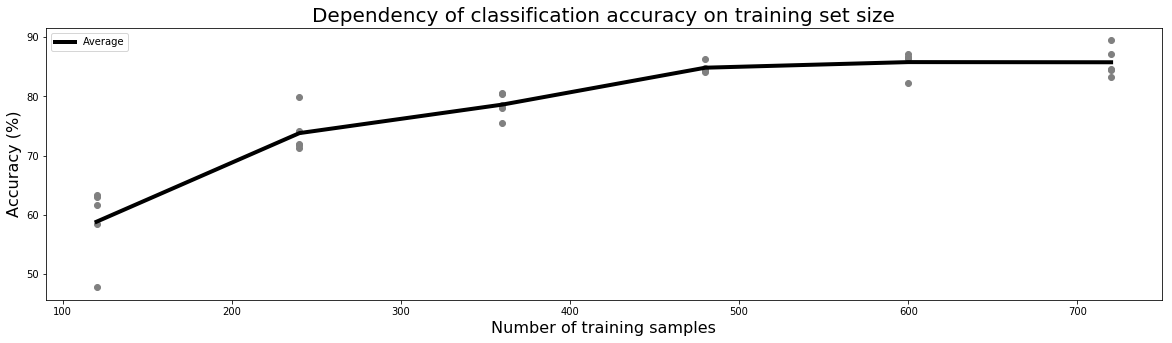

In [35]:
# plt.figure(figsize=(20,5))

# plt.plot(np.arange(stride,maxTrnImgs+stride,stride),accuracy*100, color='gray', marker='o', linestyle='None')
# plt.plot(np.arange(stride,maxTrnImgs+stride,stride),accuracy.mean(axis=1)*100, color='k', linewidth=4, label='Average')
# plt.xlabel('Number of training samples', fontsize=16)
# plt.ylabel('Accuracy (%)', fontsize=16)
# plt.title('Dependency of classification accuracy on training set size', fontsize=20)
# plt.legend()
# plt.show()

# # This network is not fine tuned to achieve higher classification accuracies.

.. code-links:: python clear